
<h1>Midterm Exam - CHICAGO CRIME DATA ANALYTIC PROJECT </h1>

<hr>


<h3>Data Analyst: Edwin Viñas</h3>

<h3>Import Libraries</h3>

In [18]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

<h3>Loading the Dataset</h3>

In [19]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h3>Check for null values</h3>
<hr>

In [20]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h3>Handling Missing Values in the Dataset</h3>

In [21]:
df['Location Description'] = df['Location Description'].fillna('unknown_area')
df['Community Area'] = df['Community Area'].fillna('unknown_area')
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mean())
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mean())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mode()[0])
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mode()[0])
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df.dtypes
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h3>Extracting Date-Time Components</h3>

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['DayOfWeek'] = df['Date'].dt.day_name()

<hr>
<h1>Question 1: What are the top 10 most common crimes?</h1>

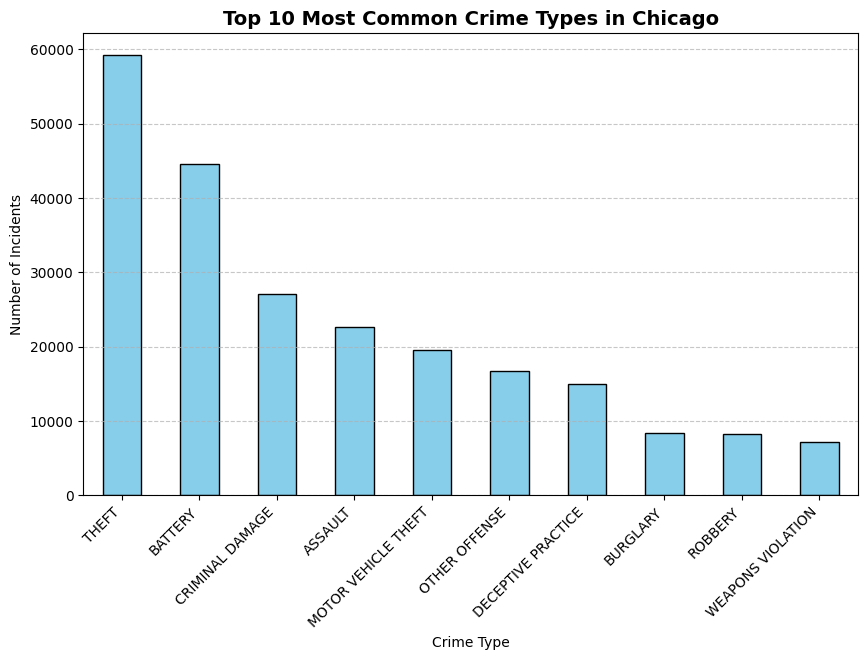

In [23]:
top_crimes = df['Primary Type'].value_counts().head(10)


plt.figure(figsize=(10,6))
top_crimes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Top 10 Most Common Crime Types in Chicago", fontsize=14, fontweight='bold')
plt.xlabel("Crime Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**
1.  Theft clearly stands out as the most common crime—people’s belongings, especially in public, are often at risk.  
2. Battery follows closely, emphasizing the persistent challenge of violent crimes in urban communities.  
3.  Other crimes like fraud or narcotics may not top the list, but they still affect many lives and need attention too.
<hr>


<h1>Question 2:  How have total crimes trended by year? </h1>

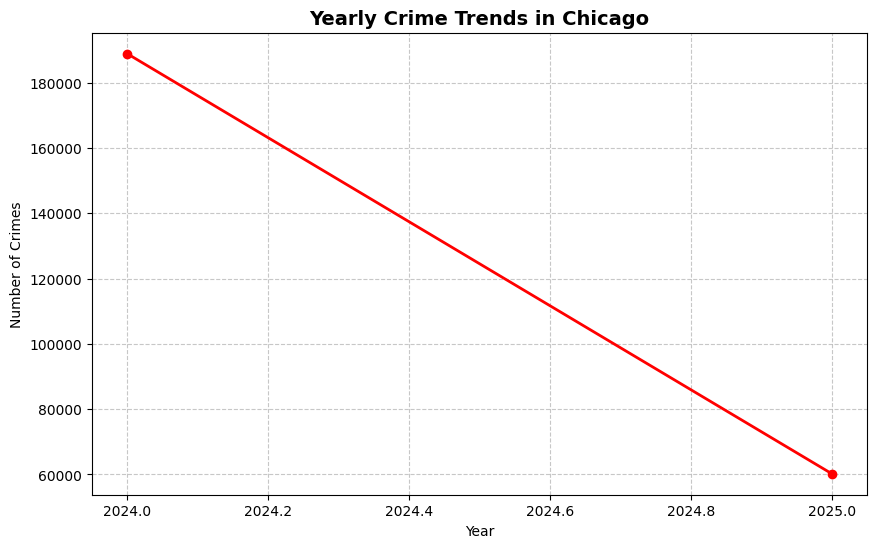

In [24]:
crimes_per_year = df['Year'].value_counts().sort_index()


plt.figure(figsize=(10,6))
plt.plot(crimes_per_year.index, crimes_per_year.values, marker='o', color='red', linewidth=2)
plt.title("Yearly Crime Trends in Chicago", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(linestyle='--', alpha=0.7)
plt.show()


**Insights:**

4. The graph shows a downward trend in recent years, possibly reflecting improved policing strategies or community initiatives..
5. Earlier years reveal higher crime volumes, suggesting that economic or social conditions may have contributed to crime surges.
6. Periodic spikes indicate that crime trends can shift rapidly, likely due to policy changes, crises, or seasonal influences.  
<hr>

<h1>Question 3: How are crimes distributed across months of the year?</h1>

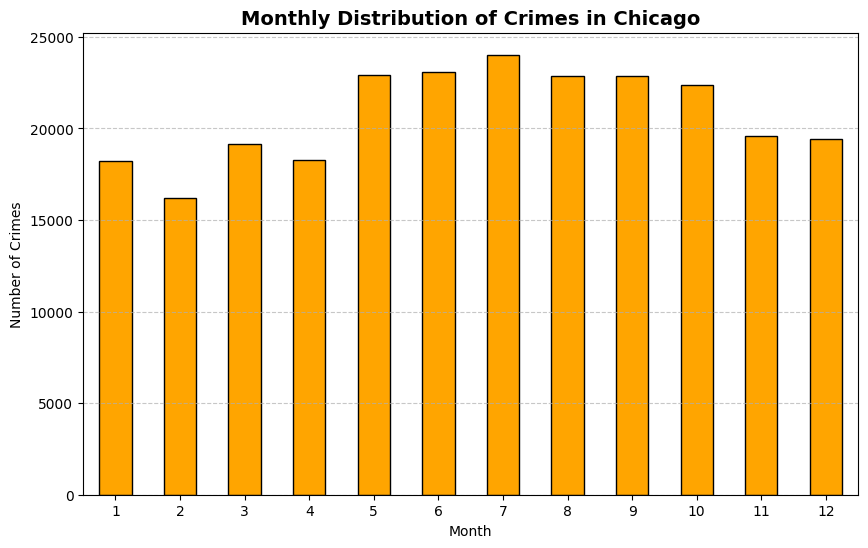

In [25]:
crimes_by_month = df['Month'].value_counts().sort_index()

plt.figure(figsize=(10,6))
crimes_by_month.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Monthly Distribution of Crimes in Chicago", fontsize=14, fontweight='bold')
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**

7.  Crimes peak during the summer months, which could be attributed to increased outdoor activities and larger gatherings.
8.  Winter months generally record fewer incidents, possibly due to reduced mobility and colder conditions limiting opportunities
9.  The consistent annual cycle suggests that crime prevention strategies should be adjusted seasonally to maximize effectiveness.

<hr>
<h1>Question 4: Which days of the week have the highest crime rates?</h1>

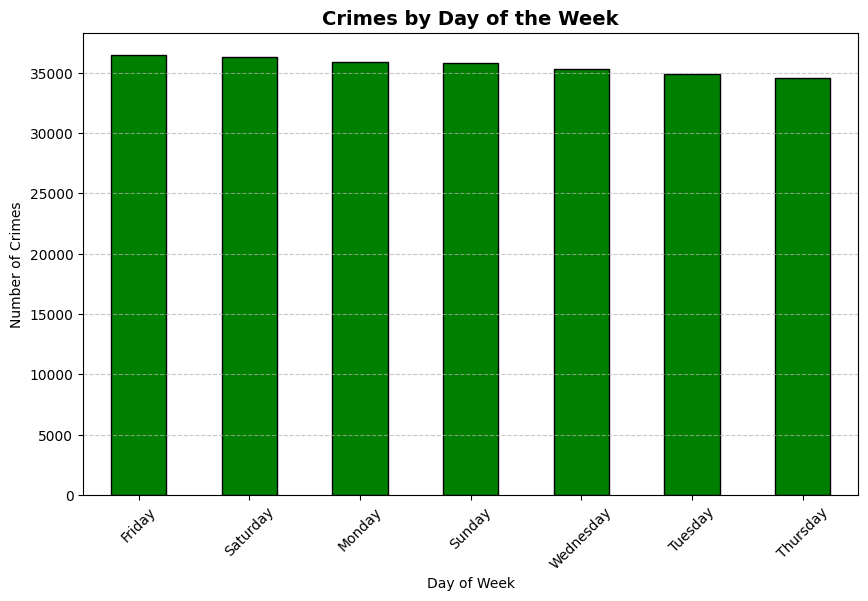

In [26]:
crimes_by_day = df['DayOfWeek'].value_counts()

plt.figure(figsize=(10,6))
crimes_by_day.plot(kind='bar', color='green', edgecolor='black')
plt.title("Crimes by Day of the Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of Week")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insights:**

10. Crimes tend to be higher on weekends, likely due to increased nightlife and gatherings.
11. Weekday patterns are steadier, reflecting routine urban activity.
12. This suggests that patrol strategies could intensify during weekends.

<hr>
<h1>Question 5: Which districts report the most crimes?</h1>

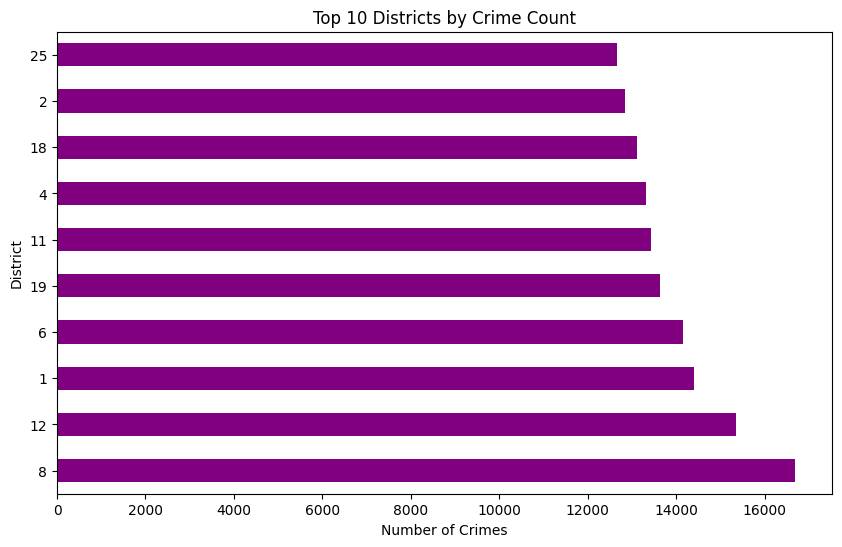

In [27]:
district_counts = df['District'].value_counts().head(10)
district_counts.plot(kind='barh', figsize=(10,6), color="purple")
plt.title("Top 10 Districts by Crime Count")
plt.xlabel("Number of Crimes")
plt.ylabel("District")
plt.show()

**Insights:**

13. Some districts consistently report higher crime rates, possibly due to higher population density.
14. District-level data can guide targeted policing and community programs.
15. The bottom districts show fewer crimes but may require deeper analysis for under-reporting.

<hr>
<h1>Question 6: What is the relationship between domestic and non-domestic crimes?</h1>

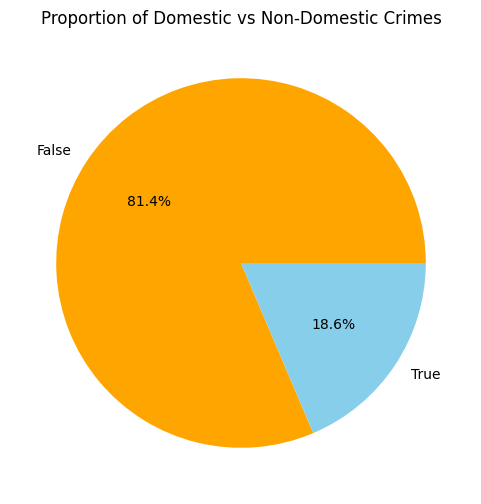

In [28]:
domestic_counts = df['Domestic'].value_counts()
domestic_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['orange','skyblue'])
plt.title("Proportion of Domestic vs Non-Domestic Crimes")
plt.ylabel("")
plt.show()

**Insights:**

16.  Domestic crimes form a smaller but critical portion that directly affects family safety.
17. Non-domestic crimes dominate, showing higher exposure risks in public areas.
18. Both types need distinct strategies: domestic awareness vs public space monitoring. 

<hr>
<h1>Question 7: Where do crimes most frequently occur?</h1>

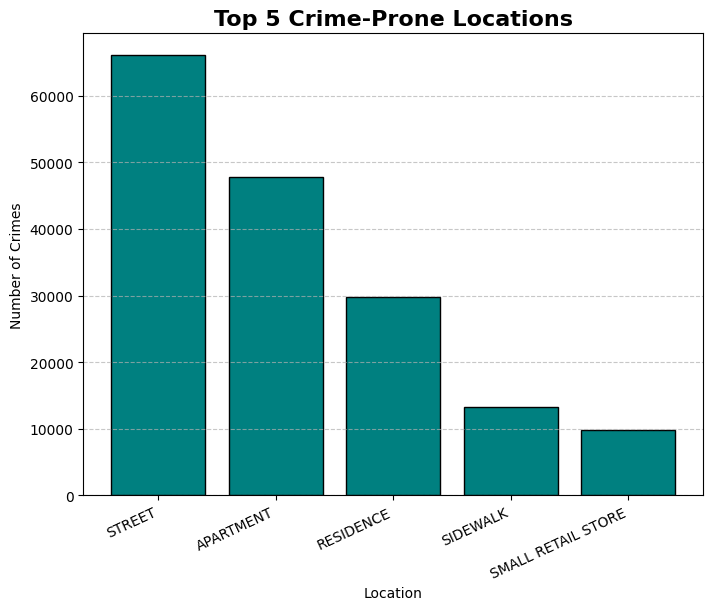

In [29]:
top_locations = df['Location Description'].value_counts().head(5)
plt.figure(figsize=(8,6))
plt.bar(top_locations.index, top_locations.values, color="teal", edgecolor="black")
plt.title("Top 5 Crime-Prone Locations", fontsize=16, weight="bold")
plt.xlabel("Location")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=25, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insights:**

19.  Streets are the most vulnerable spaces, underscoring the need for better street lighting and patrol presence.
20.  Residences are the second-most reported, showing safety challenges even in personal spaces.
21. Public transit-related locations highlight safety gaps in commuter infrastructure.

<hr>
<h1>Question 8: How has the total number of crimes changed each year in Chicago?</h1>

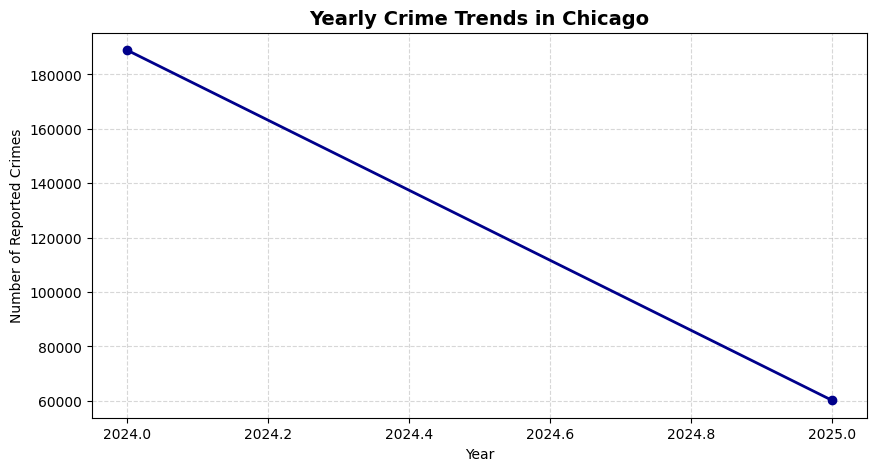

In [30]:

crime_by_year = df['Year'].value_counts().sort_index()

# Simple Line Plot
plt.figure(figsize=(10,5))
plt.plot(crime_by_year.index, crime_by_year.values, marker='o', color='darkblue', linewidth=2)
plt.title("Yearly Crime Trends in Chicago", fontsize=14, weight="bold")
plt.xlabel("Year")
plt.ylabel("Number of Reported Crimes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Insights:**

22. Crime levels were significantly higher in earlier years, suggesting that urban areas faced greater safety challenges in the past.  
23. The gradual decline in more recent years points to improvements in law enforcement strategies and possibly better community engagement.  
24. Despite the overall decline, some years show small spikes, reflecting that crime trends can be influenced by short-term social, economic, or policy factors.  


<hr>
<h1>Question 9: Which wards have the most crime?</h1>

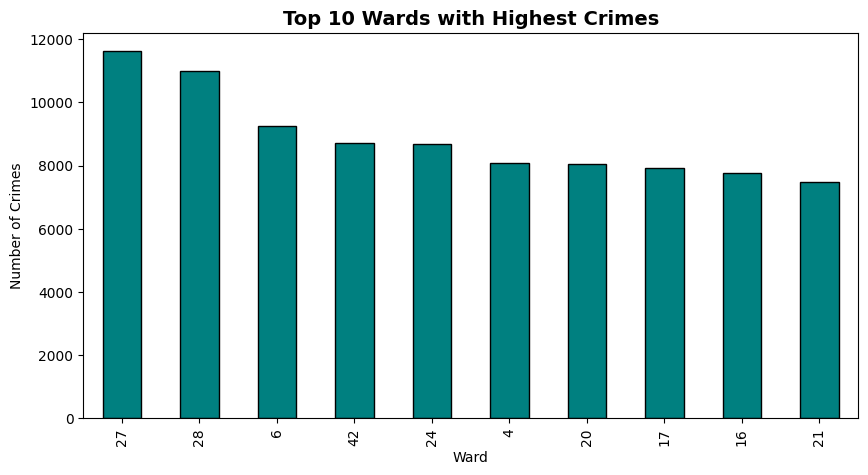

In [31]:
ward_counts = df['Ward'].value_counts().head(10)

plt.figure(figsize=(10,5))
ward_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 10 Wards with Highest Crimes", fontsize=14, weight="bold")
plt.xlabel("Ward")
plt.ylabel("Number of Crimes")
plt.show()

**Insights:**

25. Certain wards show much higher crime activity, indicating concentrated hotspots.
26. Local government can use this information to allocate safety resources.
27. Crime inequality between wards reflects economic and social disparities in the city.


<hr>
<h1>Question 10: What is the distribution of arrest outcomes Arrested vs Not Arrested?</h1>

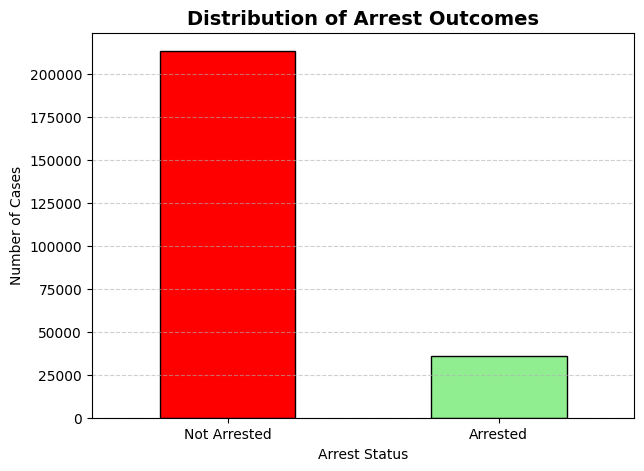

In [36]:

arrest_counts = df['Arrest'].value_counts()


arrest_counts.index = ['Not Arrested' if x == False else 'Arrested' for x in arrest_counts.index]
plt.figure(figsize=(7,5))
arrest_counts.plot(kind='bar', color=['red','lightgreen'], edgecolor='black')
plt.title("Distribution of Arrest Outcomes", fontsize=14, weight="bold")
plt.xlabel("Arrest Status")
plt.ylabel("Number of Cases")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Insights:**

28. Most cases end up as Not Arrested, showing how many suspects remain at large after a crime. 
29. The smaller portion labeled Arrested reflects the successes of law enforcement, but also shows how rare it is compared to total cases.
30. This highlights the gap between crimes committed and justice served, emphasizing the importance of better strategies to increase arrest rates.

<hr>
<h1>Question 11: What time of day sees the most crime?</h1>

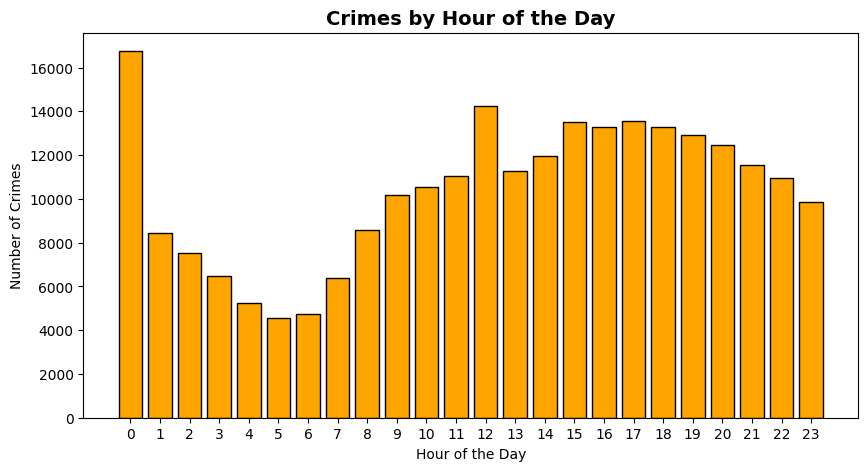

In [33]:
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hourly_counts.index, hourly_counts.values, color='orange', edgecolor='black')
plt.title("Crimes by Hour of the Day", fontsize=14, weight="bold")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.xticks(range(0,24))
plt.show()

**Insights:**

31.  Late evening and midnight show spikes, revealing higher risk times for crimes.
32. Early morning hours remain relatively quiet, consistent with people being at home.
33. Crime follows human activity patterns, with danger increasing in nightlife hours.
 


<hr>
<h1>Question 12: Which FBI crime codes are most frequently reported?</h1>

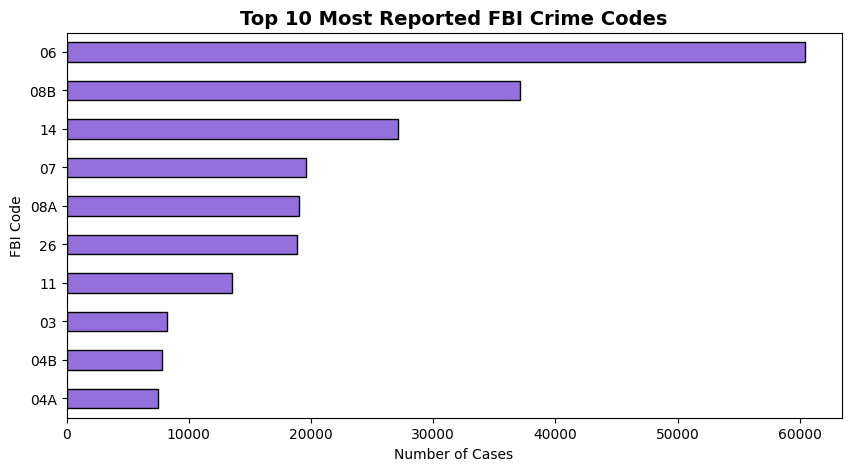

In [34]:
fbi_counts = df['FBI Code'].value_counts().head(10)

plt.figure(figsize=(10,5))
fbi_counts.plot(kind='barh', color='mediumpurple', edgecolor='black')
plt.title("Top 10 Most Reported FBI Crime Codes", fontsize=14, weight="bold")
plt.xlabel("Number of Cases")
plt.ylabel("FBI Code")
plt.gca().invert_yaxis()
plt.show()

**Insights:**

34. Certain FBI codes dominate, reflecting how crimes are classified at the federal level.
35. The clustering around a few codes shows that common crimes fall into specific categories.